In [1]:
import shap

In [2]:
import json

In [3]:
import numpy as np

In [4]:
shap.initjs()

In [5]:
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
import keras.backend as K
import numpy as np
import json

Using TensorFlow backend.


In [6]:
import tensorflow as tf

In [7]:
tf.__version__

'1.12.0'

In [8]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D


In [9]:
'''Trains a simple convnet on the MNIST dataset.
Gets to 99.25% test accuracy after 12 epochs
(there is still a lot of margin for parameter tuning).
16 seconds per epoch on a GRID K520 GPU.
'''
batch_size = 256
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

config = tf.ConfigProto(allow_soft_placement=True)
config.gpu_options.allow_growth=True
config.gpu_options.per_process_gpu_memory_fraction = 0.4
K.set_session(tf.Session(config=config))

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

DEVICE = "/gpu:0"
with tf.device(DEVICE):
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3),
                     activation='relu',
                     input_shape=input_shape))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=keras.optimizers.Adadelta(),
                  metrics=['accuracy'])

    model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              verbose=1,
              validation_data=(x_test, y_test))
    score = model.evaluate(x_test, y_test, verbose=0)


x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - ETA: 11:44 - loss: 2.3009 - acc: 0.08 - ETA: 2:56 - loss: 2.1406 - acc: 0.2402 - ETA: 1:41 - loss: 1.9763 - acc: 0.316 - ETA: 1:04 - loss: 1.8145 - acc: 0.383 - ETA: 47s - loss: 1.6588 - acc: 0.439 - ETA: 37s - loss: 1.4897 - acc: 0.50 - ETA: 30s - loss: 1.3647 - acc: 0.54 - ETA: 26s - loss: 1.2857 - acc: 0.57 - ETA: 22s - loss: 1.2000 - acc: 0.60 - ETA: 20s - loss: 1.1271 - acc: 0.62 - ETA: 18s - loss: 1.0570 - acc: 0.65 - ETA: 16s - loss: 1.0010 - acc: 0.67 - ETA: 14s - loss: 0.9521 - acc: 0.69 - ETA: 13s - loss: 0.9115 - acc: 0.70 - ETA: 12s - loss: 0.8677 - acc: 0.71 - ETA: 11s - loss: 0.8335 - acc: 0.73 - ETA: 10s - loss: 0.8000 - acc: 0.74 - ETA: 10s - loss: 0.7712 - acc: 0.75 - ETA: 9s - loss: 0.7430 - acc: 0.7606 - ETA: 8s - loss: 0.7205 - acc: 0.768 - ETA: 8s - loss: 0.6981 - acc: 0.776 - ETA: 7s - 

60000/60000 [==============================] - ETA: 4s - loss: 0.0853 - acc: 0.976 - ETA: 3s - loss: 0.0654 - acc: 0.982 - ETA: 3s - loss: 0.0644 - acc: 0.984 - ETA: 3s - loss: 0.0694 - acc: 0.981 - ETA: 3s - loss: 0.0683 - acc: 0.980 - ETA: 3s - loss: 0.0673 - acc: 0.979 - ETA: 3s - loss: 0.0665 - acc: 0.979 - ETA: 3s - loss: 0.0695 - acc: 0.979 - ETA: 3s - loss: 0.0681 - acc: 0.979 - ETA: 3s - loss: 0.0673 - acc: 0.979 - ETA: 2s - loss: 0.0699 - acc: 0.978 - ETA: 2s - loss: 0.0689 - acc: 0.979 - ETA: 2s - loss: 0.0698 - acc: 0.978 - ETA: 2s - loss: 0.0703 - acc: 0.978 - ETA: 2s - loss: 0.0713 - acc: 0.978 - ETA: 2s - loss: 0.0703 - acc: 0.978 - ETA: 2s - loss: 0.0710 - acc: 0.978 - ETA: 2s - loss: 0.0709 - acc: 0.978 - ETA: 2s - loss: 0.0706 - acc: 0.978 - ETA: 2s - loss: 0.0694 - acc: 0.979 - ETA: 2s - loss: 0.0687 - acc: 0.979 - ETA: 2s - loss: 0.0687 - acc: 0.979 - ETA: 2s - loss: 0.0684 - acc: 0.979 - ETA: 2s - loss: 0.0674 - acc: 0.980 - ETA: 2s - loss: 0.0672 - acc: 0.980 - ETA

60000/60000 [==============================] - ETA: 3s - loss: 0.0340 - acc: 0.988 - ETA: 3s - loss: 0.0393 - acc: 0.987 - ETA: 3s - loss: 0.0423 - acc: 0.987 - ETA: 3s - loss: 0.0384 - acc: 0.988 - ETA: 3s - loss: 0.0377 - acc: 0.989 - ETA: 3s - loss: 0.0377 - acc: 0.989 - ETA: 3s - loss: 0.0399 - acc: 0.988 - ETA: 3s - loss: 0.0422 - acc: 0.988 - ETA: 3s - loss: 0.0420 - acc: 0.987 - ETA: 3s - loss: 0.0412 - acc: 0.987 - ETA: 2s - loss: 0.0405 - acc: 0.988 - ETA: 2s - loss: 0.0409 - acc: 0.987 - ETA: 2s - loss: 0.0415 - acc: 0.987 - ETA: 2s - loss: 0.0404 - acc: 0.987 - ETA: 2s - loss: 0.0392 - acc: 0.988 - ETA: 2s - loss: 0.0392 - acc: 0.987 - ETA: 2s - loss: 0.0404 - acc: 0.988 - ETA: 2s - loss: 0.0407 - acc: 0.988 - ETA: 2s - loss: 0.0409 - acc: 0.988 - ETA: 2s - loss: 0.0406 - acc: 0.988 - ETA: 2s - loss: 0.0414 - acc: 0.987 - ETA: 2s - loss: 0.0414 - acc: 0.988 - ETA: 2s - loss: 0.0413 - acc: 0.987 - ETA: 2s - loss: 0.0420 - acc: 0.987 - ETA: 2s - loss: 0.0420 - acc: 0.987 - ETA

60000/60000 [==============================] - ETA: 3s - loss: 0.0583 - acc: 0.988 - ETA: 3s - loss: 0.0392 - acc: 0.989 - ETA: 3s - loss: 0.0326 - acc: 0.990 - ETA: 3s - loss: 0.0327 - acc: 0.989 - ETA: 3s - loss: 0.0342 - acc: 0.990 - ETA: 3s - loss: 0.0323 - acc: 0.990 - ETA: 3s - loss: 0.0325 - acc: 0.990 - ETA: 3s - loss: 0.0328 - acc: 0.990 - ETA: 3s - loss: 0.0322 - acc: 0.990 - ETA: 3s - loss: 0.0328 - acc: 0.990 - ETA: 2s - loss: 0.0318 - acc: 0.991 - ETA: 2s - loss: 0.0322 - acc: 0.990 - ETA: 2s - loss: 0.0317 - acc: 0.990 - ETA: 2s - loss: 0.0316 - acc: 0.990 - ETA: 2s - loss: 0.0314 - acc: 0.990 - ETA: 2s - loss: 0.0322 - acc: 0.990 - ETA: 2s - loss: 0.0322 - acc: 0.990 - ETA: 2s - loss: 0.0321 - acc: 0.990 - ETA: 2s - loss: 0.0327 - acc: 0.990 - ETA: 2s - loss: 0.0323 - acc: 0.990 - ETA: 2s - loss: 0.0325 - acc: 0.990 - ETA: 2s - loss: 0.0330 - acc: 0.990 - ETA: 2s - loss: 0.0324 - acc: 0.990 - ETA: 2s - loss: 0.0321 - acc: 0.990 - ETA: 2s - loss: 0.0320 - acc: 0.990 - ETA

In [10]:

print('Test loss:', score[0])
print('Test accuracy:', score[1])

# select a set of background examples to take an expectation over
background = x_train[np.random.choice(x_train.shape[0], 8, replace=False)]

# explain predictions of the model on four images
e = shap.DeepExplainer(model, background)
# ...or pass tensors directly
# e = shap.DeepExplainer((model.layers[0].input, model.layers[-1].output), background)
shap_values = e.shap_values(x_test[1:5])



Test loss: 0.025665703979230965
Test accuracy: 0.9921


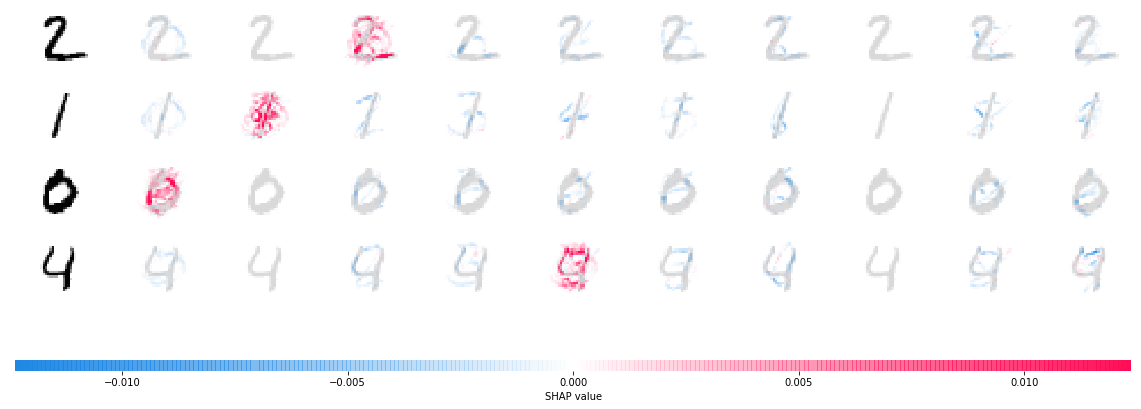

In [11]:
# plot the feature attributions
shap.image_plot(shap_values, -x_test[1:5])


In [ ]:
x_train.shape

In [ ]:
background.shape

In [ ]:
model.shape

In [ ]:
x_test.shape

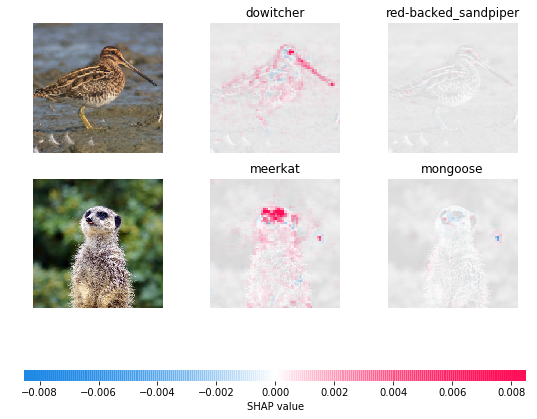

In [12]:
# load pre-trained model and choose two images to explain
model = VGG16(weights='imagenet', include_top=True)
X,y = shap.datasets.imagenet50()
to_explain = X[[39,41]]

# load the ImageNet class names
url = "https://s3.amazonaws.com/deep-learning-models/image-models/imagenet_class_index.json"
fname = shap.datasets.cache(url)
with open(fname) as f:
    class_names = json.load(f)

# explain how the input to the 7th layer of the model explains the top two classes
def map2layer(x, layer):
    feed_dict = dict(zip([model.layers[0].input], [preprocess_input(x.copy())]))
    return K.get_session().run(model.layers[layer].input, feed_dict)
e = shap.GradientExplainer(
    (model.layers[7].input, model.layers[-1].output),
    map2layer(X, 7),
    local_smoothing=0 # std dev of smoothing noise
)
shap_values,indexes = e.shap_values(map2layer(to_explain, 7), ranked_outputs=2)

# get the names for the classes
index_names = np.vectorize(lambda x: class_names[str(x)][1])(indexes)

# plot the explanations
shap.image_plot(shap_values, to_explain, index_names)

In [ ]:
index_names